In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
df.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [5]:
def DescriptiveStatistics(df):
    print("No of rwos and columns information:",df.shape)
    print("")
    print("---"*20)
    print("")
    print("Columns:")
    print("")
    print(df.columns.values)
    print("---"*20)
    print("")
    print(df.info())
    print("---"*20)
    print("")
    print(df.describe())


In [6]:
DescriptiveStatistics(df)

No of rwos and columns information: (480, 17)

------------------------------------------------------------

Columns:

['gender' 'NationalITy' 'PlaceofBirth' 'StageID' 'GradeID' 'SectionID'
 'Topic' 'Semester' 'Relation' 'raisedhands' 'VisITedResources'
 'AnnouncementsView' 'Discussion' 'ParentAnsweringSurvey'
 'ParentschoolSatisfaction' 'StudentAbsenceDays' 'Class']
------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480

In [7]:
def CheckMissingInfo(df):
    print(df.isnull().sum())
    print("---"*20)
    print("")
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    print(missing_data)

In [8]:
CheckMissingInfo(df)

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64
------------------------------------------------------------

Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [9]:
def GetColumnCount(df):
    int_columns = [col for col in df.columns if(df[col].dtype != "object")]
    print("No of integer type columns:",len(int_columns))
    print(int_columns)
    print("")
    obj_columns = [col for col in df.columns if(df[col].dtype == "object")]
    print("No of object type columns:",len(obj_columns))
    print(obj_columns)
    return int_columns,obj_columns

In [10]:
int_columns,obj_columns = GetColumnCount(df)

No of integer type columns: 4
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

No of object type columns: 13
['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']


In [11]:
def GetCountPlots(df,obj_columns):
    for col in obj_columns:
        if(len(df[col].value_counts()) < 5):
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(12,6))
        print(sns.countplot(x=col, data=df, palette="muted"))
        plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


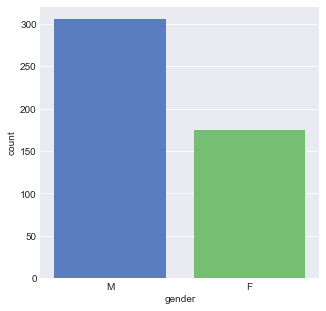

AxesSubplot(0.125,0.125;0.775x0.755)


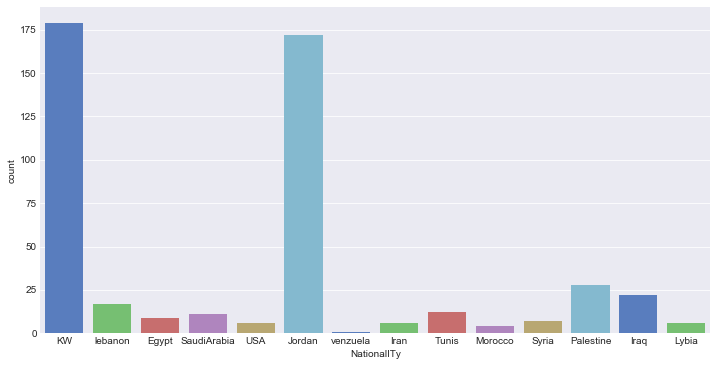

AxesSubplot(0.125,0.125;0.775x0.755)


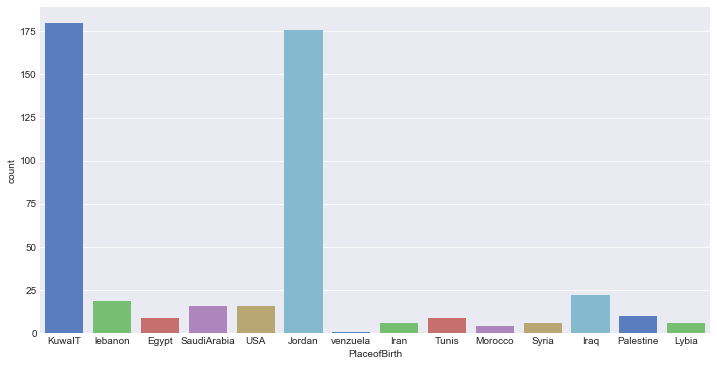

AxesSubplot(0.125,0.125;0.775x0.755)


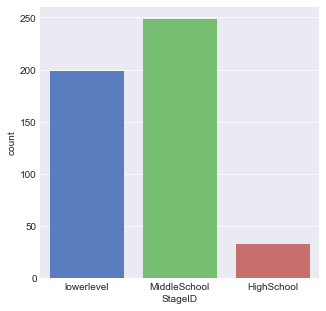

AxesSubplot(0.125,0.125;0.775x0.755)


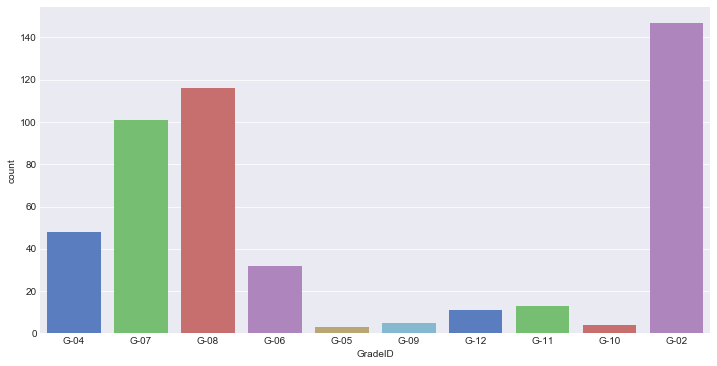

AxesSubplot(0.125,0.125;0.775x0.755)


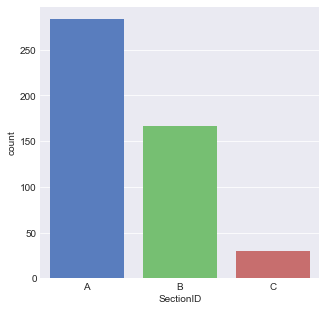

AxesSubplot(0.125,0.125;0.775x0.755)


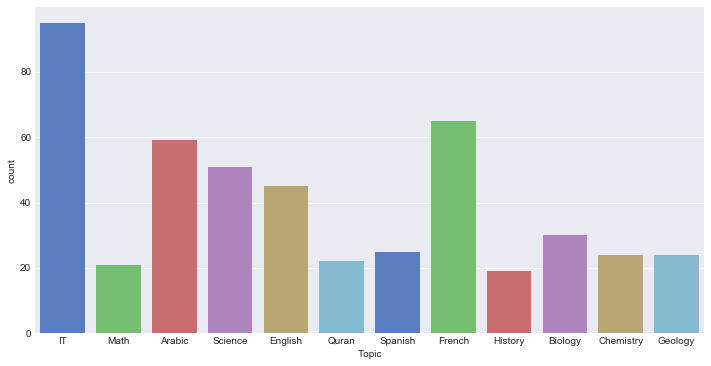

AxesSubplot(0.125,0.125;0.775x0.755)


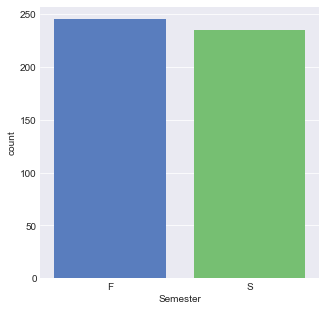

AxesSubplot(0.125,0.125;0.775x0.755)


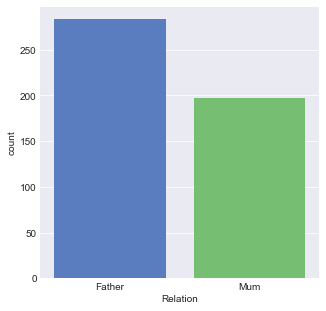

AxesSubplot(0.125,0.125;0.775x0.755)


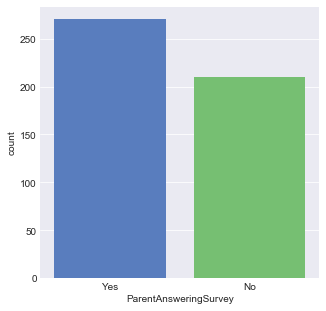

AxesSubplot(0.125,0.125;0.775x0.755)


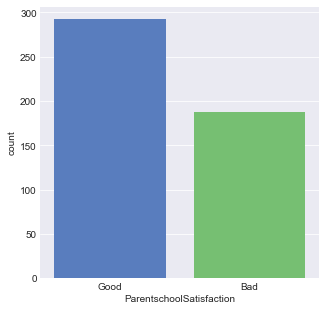

AxesSubplot(0.125,0.125;0.775x0.755)


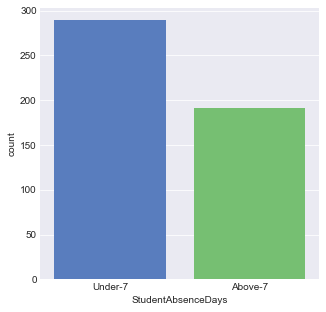

AxesSubplot(0.125,0.125;0.775x0.755)


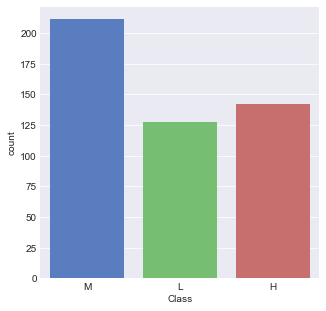

In [12]:
GetCountPlots(df,obj_columns)

In [13]:
def GetCardinality(df,obj_columns):
    for col in obj_columns:
        print("{0} :: {1}".format(col,len(df[col].value_counts())))
        
        print(df[col].value_counts())
        print("")

In [14]:
GetCardinality(df,obj_columns)

gender :: 2
M    305
F    175
Name: gender, dtype: int64

NationalITy :: 14
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
Iran             6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

PlaceofBirth :: 14
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Lybia            6
Iran             6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

StageID :: 3
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

GradeID :: 10
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

SectionID :: 3
A    283
B    167
C     30

In [15]:
pd.crosstab(df['Class'],df['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


In [16]:
def GetCountPlots_with_hue(df,obj_columns,col_hue):
    for col in obj_columns:
        if(len(df[col].value_counts()) < 5):
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(12,6))
        #print(sns.countplot(x=col, data=df, palette="muted"))
        sns.countplot(x=col,data = df, hue=col_hue,palette='bright')
        plt.show()

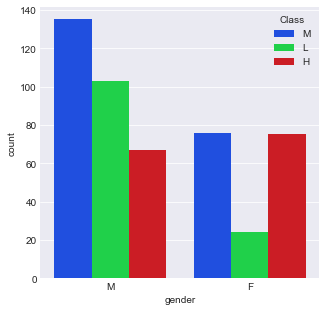

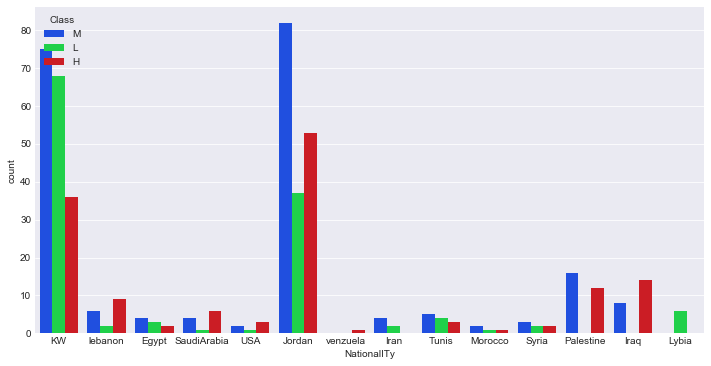

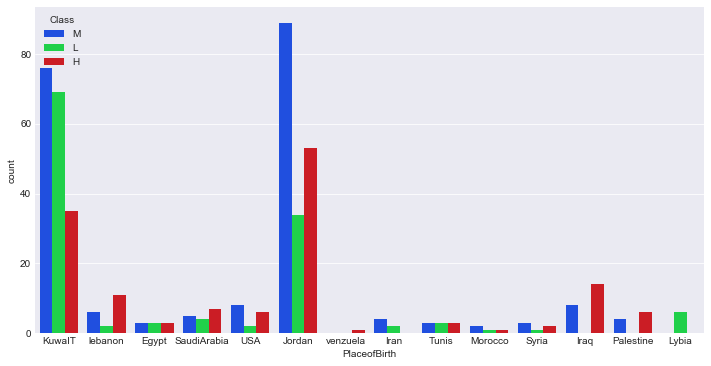

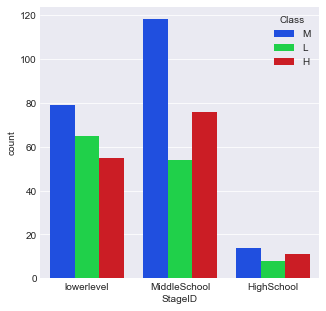

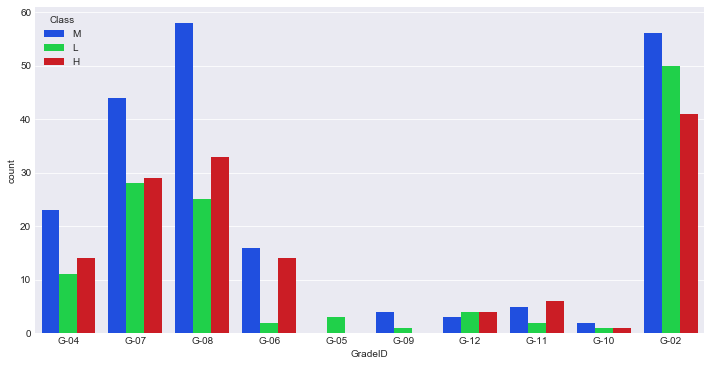

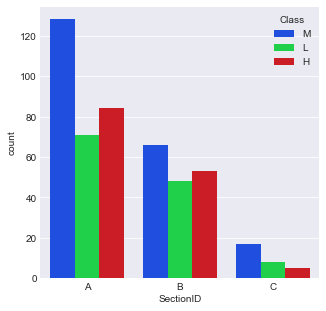

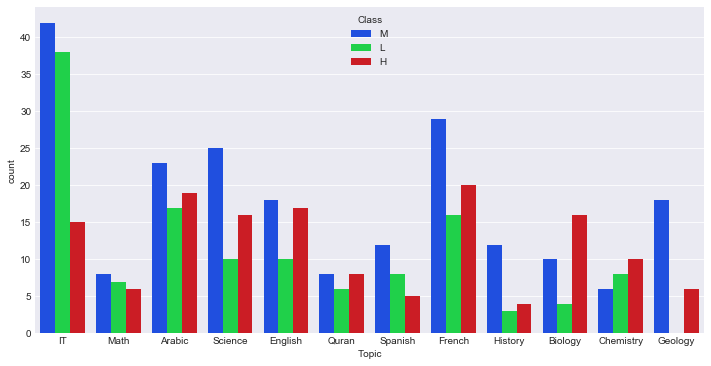

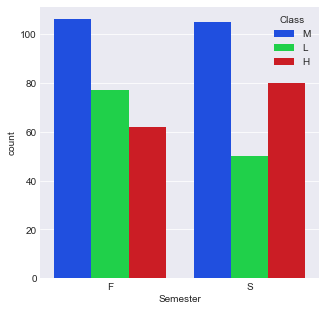

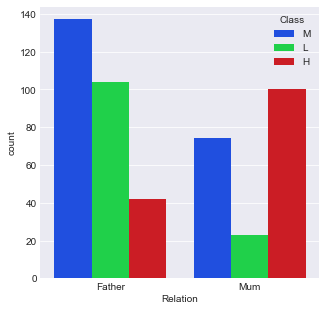

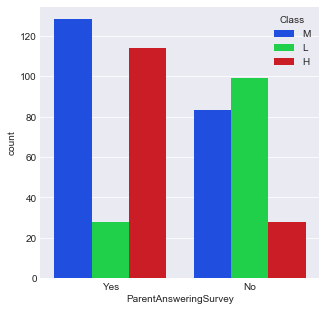

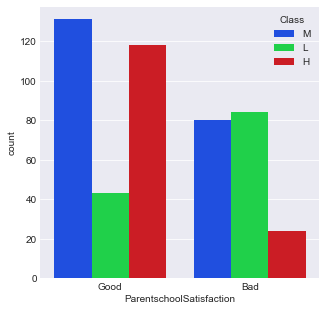

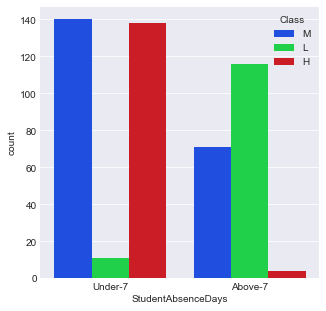

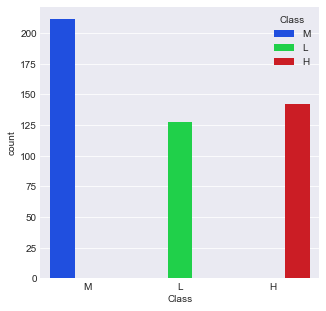

In [17]:
GetCountPlots_with_hue(df,obj_columns,'Class')

In [18]:
def GetBoxPlots(df,x_col):
    for col in int_columns:
        plt.figure(figsize=(5,5))
        boxplot1 = sns.boxplot(x=x_col, y=col, data=df)
        boxplot1 = sns.swarmplot(x=x_col, y=col, data=df, color=".15")
        plt.show()

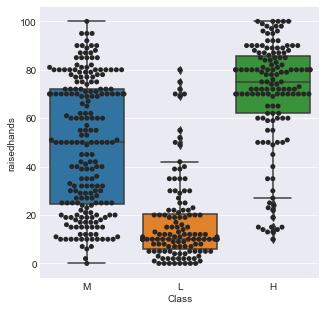

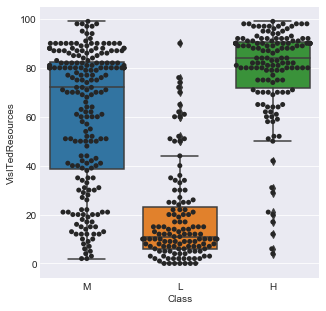

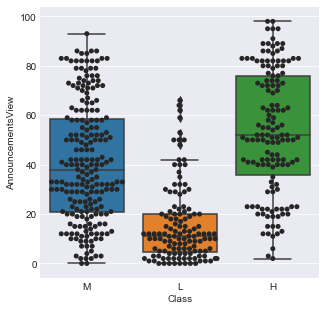

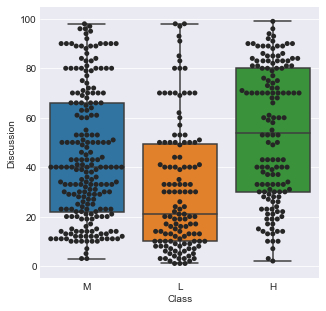

In [19]:
GetBoxPlots(df,'Class')

In [20]:
df['Failed'] = np.where(df['Class']=='L',1,0)



In [21]:
df['AbsBoolean'] = df['StudentAbsenceDays']
df['AbsBoolean'] = np.where(df['AbsBoolean'] == 'Under-7',0,1)
df['AbsBoolean'].groupby(df['Topic']).mean()

Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: AbsBoolean, dtype: float64

In [22]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Failed,AbsBoolean
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 19 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
Failed                      480 non-null int64
AbsBoolean                  480 non-

In [24]:
def NumaricVariablesDistributions(df):
    int_columns=df.columns[df.dtypes==int]
    plt.figure(figsize=(10,7))
    for i, column in enumerate(int_columns):
        plt.subplot(3,2, i+1)
        sns.distplot(df[column], label=column, bins=10, fit=norm)
        plt.ylabel('Density');

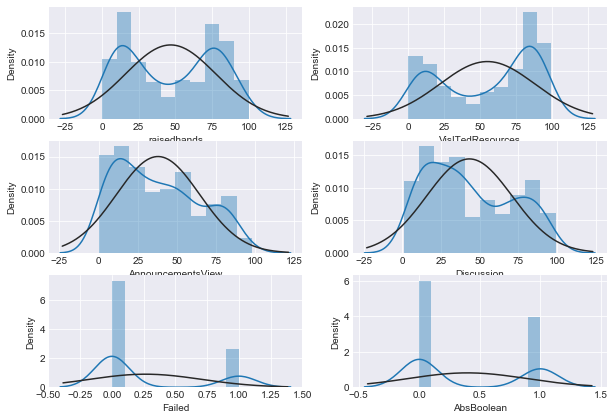

In [25]:
NumaricVariablesDistributions(df)

- Features doesn't have gaussian (normal) distribution.
- As ML algorithms deal better with values, which are normally distributed, we need to transfrom them closer that view. BoxCox transformation will help us with it

In [26]:
def ApplyBoxcoxTransformation(df,columns):
    plt.figure(figsize=(10,7))
    for i, column in enumerate(columns):
        plt.subplot(2,2, i+1)
        df[column]=boxcox1p(df[column], 0.3)
        sns.distplot(df[column], label=column, bins=10, fit=norm)
        plt.ylabel('Density')

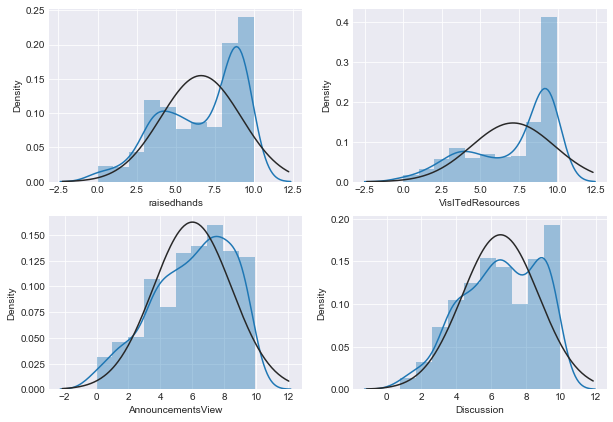

In [27]:
ApplyBoxcoxTransformation(df,['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'])

- However raisedhands and visitedresourses have double gaussian distribution. We can create new binary features for them, where 1 is when values more than its' average, and 0 - less. Then we can look how these features will improve model

In [28]:
df['raisedhands_bin']=np.where(df.raisedhands>df.raisedhands.mean(),1,0)
df['VisITedResources_bin']=np.where(df.VisITedResources>df.VisITedResources.mean(),1,0)

- It appears that no one failed Geology while students in IT, Chemistry, and Math had the highest probability of failing.

- The boxplot analysis indicates that those who did well were more active in class, and the worst performers were the least active.

- It is clear that the lowest performers rarely visited the course resources. The swarmplot shapes also indicates that the highest and lowest performers had the most consistent habits with respect to viewing the course resources. 

- It also appears that less students from all groups viewed course announcements, but there is still a clear pattern with viewing course announcements and how well the student performed.

- The biggest visual trend can be seen in how frequently the student was absent. Over 90% of the students who did poorly were absent more than seven times, while almost none of the students who did well were absent more than seven times.


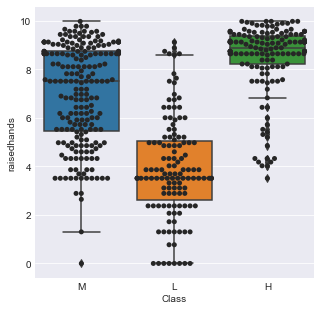

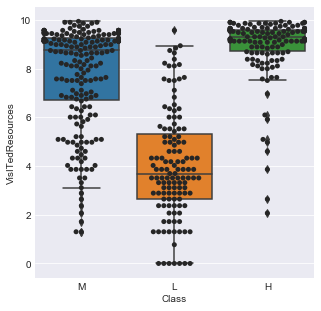

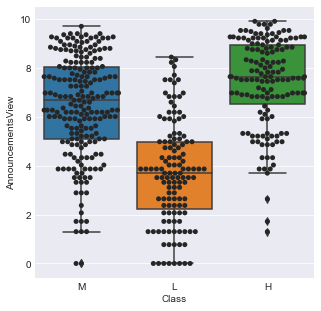

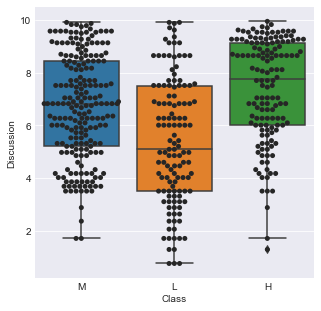

In [29]:
GetBoxPlots(df,'Class')

Let's look at correlation between these features:
- VisitedResources, RaisedHands and AnnouncementViews have medium correlation (0.5-0.7)

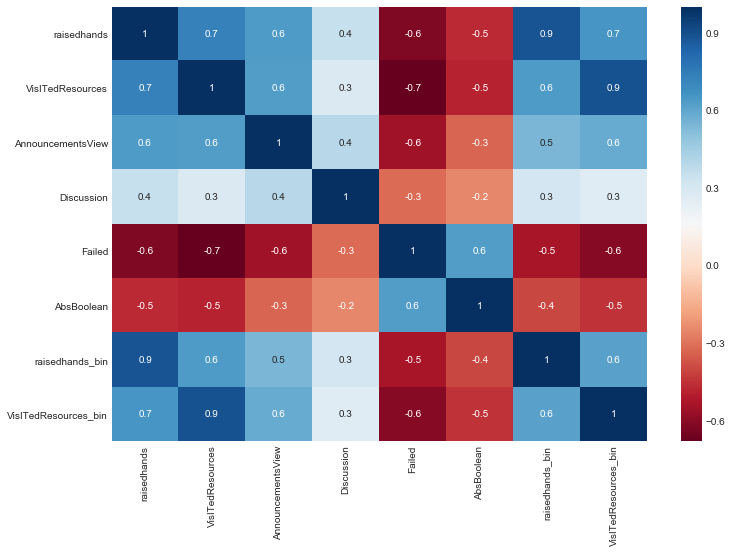

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='RdBu');

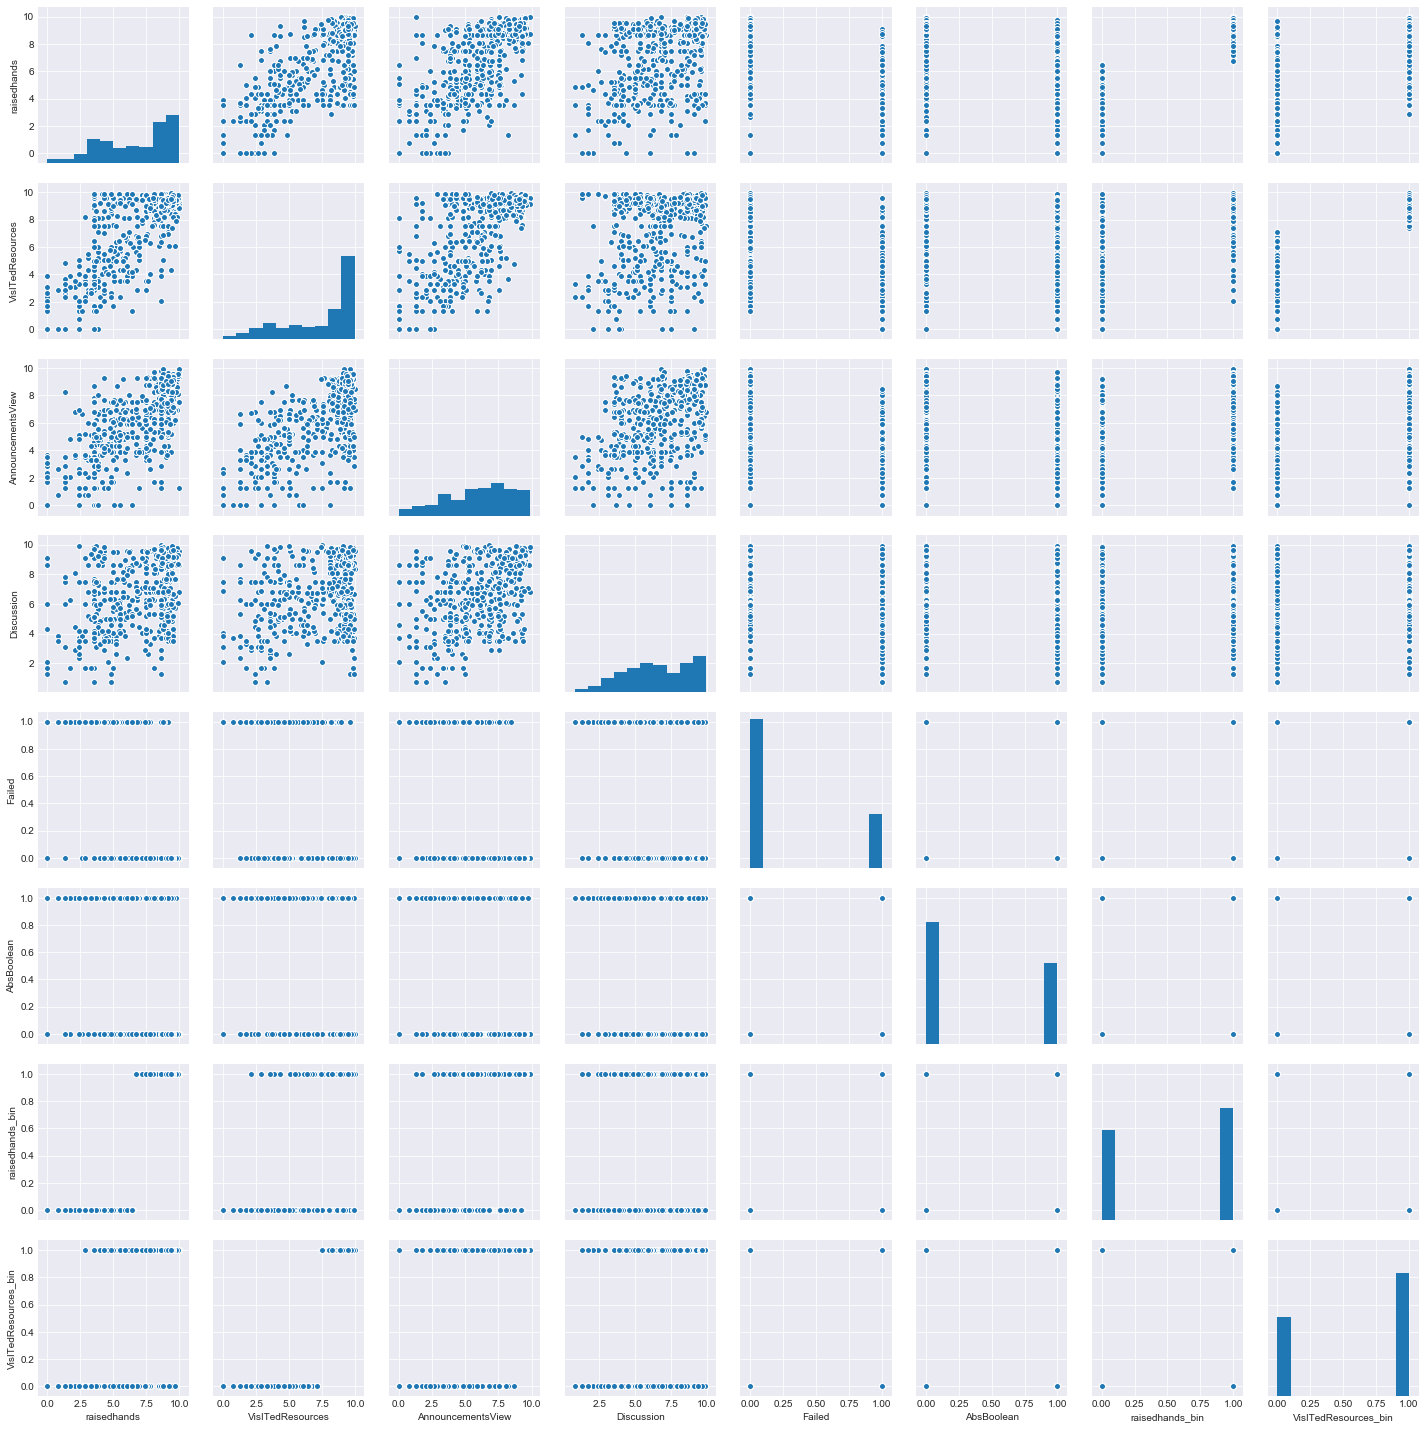

In [31]:
sns.pairplot(df);

In [32]:
print('Percent of students\' nationality - Kuwait or Jordan: {}'.format(
            round(100*df.NationalITy.isin(['KW','Jordan']).sum()/df.shape[0],2)))

Percent of students' nationality - Kuwait or Jordan: 73.12


In [33]:
target=df['Class']
df=df.drop('Class', axis=1)

In [34]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Failed,AbsBoolean,raisedhands_bin,VisITedResources_bin
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,4.324656,4.465209,1.301297,4.975586,Yes,Good,Under-7,0,0,0,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,4.975586,4.975586,1.719055,5.525382,Yes,Good,Under-7,0,0,0,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,3.510455,2.886887,0.000000,6.005384,No,Bad,Above-7,1,1,0,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,6.005384,5.525382,2.372566,6.433854,No,Bad,Above-7,1,1,0,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,6.822461,7.509675,3.862179,7.509675,No,Bad,Above-7,0,1,1,1


In [35]:
#Create new feature - type of topic (technical, language, other)
Topic_types={'Math':'technic', 'IT':'technic','Science':'technic','Biology':'technic',
 'Chemistry':'technic', 'Geology':'technic', 'Arabic':'language', 'English':'language',
 'Spanish':'language','French':'language', 'Quran':'other' ,'History':'other'}
df['Topic_type']=df.Topic.map(Topic_types)

In [36]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Failed,AbsBoolean,raisedhands_bin,VisITedResources_bin,Topic_type
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,4.324656,...,1.301297,4.975586,Yes,Good,Under-7,0,0,0,0,technic
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,4.975586,...,1.719055,5.525382,Yes,Good,Under-7,0,0,0,0,technic
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,3.510455,...,0.000000,6.005384,No,Bad,Above-7,1,1,0,0,technic
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,6.005384,...,2.372566,6.433854,No,Bad,Above-7,1,1,0,0,technic
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,6.822461,...,3.862179,7.509675,No,Bad,Above-7,0,1,1,1,technic


In [37]:
int_columns,obj_columns = GetColumnCount(df)

No of integer type columns: 8
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'Failed', 'AbsBoolean', 'raisedhands_bin', 'VisITedResources_bin']

No of object type columns: 13
['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Topic_type']


In [38]:
def ApplyScaling(df):
    for column in ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']:
        SS=StandardScaler().fit(df[[column]])
        df[[column]]=SS.transform(df[[column]])

In [39]:
ApplyScaling(df)

In [40]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Failed,AbsBoolean,raisedhands_bin,VisITedResources_bin,Topic_type
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,-0.891958,...,-1.914708,-0.709719,Yes,Good,Under-7,0,0,0,0,technic
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,-0.639476,...,-1.744679,-0.459982,Yes,Good,Under-7,0,0,0,0,technic
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,-1.207769,...,-2.444343,-0.241948,No,Bad,Above-7,1,1,0,0,technic
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,-0.240039,...,-1.478697,-0.047323,No,Bad,Above-7,1,1,0,0,technic
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.076888,...,-0.872417,0.441353,No,Bad,Above-7,0,1,1,1,technic


In [41]:
int_columns,obj_columns = GetColumnCount(df)

No of integer type columns: 8
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'Failed', 'AbsBoolean', 'raisedhands_bin', 'VisITedResources_bin']

No of object type columns: 13
['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Topic_type']


In [42]:
def LabelEncoding(df):
    for column in obj_columns:
        #Binarize and LabelEncode
        if ((df[column].value_counts().shape[0]==2) | (column=='StageID') | (column=='GradeID')):
            le=LabelEncoder().fit(df[column])
            df[column]=le.transform(df[column])
    

In [43]:
LabelEncoding(df)

In [44]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Failed,AbsBoolean,raisedhands_bin,VisITedResources_bin,Topic_type
0,1,KW,KuwaIT,2,1,A,IT,0,0,-0.891958,...,-1.914708,-0.709719,1,1,1,0,0,0,0,technic
1,1,KW,KuwaIT,2,1,A,IT,0,0,-0.639476,...,-1.744679,-0.459982,1,1,1,0,0,0,0,technic
2,1,KW,KuwaIT,2,1,A,IT,0,0,-1.207769,...,-2.444343,-0.241948,0,0,0,1,1,0,0,technic
3,1,KW,KuwaIT,2,1,A,IT,0,0,-0.240039,...,-1.478697,-0.047323,0,0,0,1,1,0,0,technic
4,1,KW,KuwaIT,2,1,A,IT,0,0,0.076888,...,-0.872417,0.441353,0,0,0,0,1,1,1,technic


In [45]:
#One-hot encoding
df=pd.get_dummies(df)

In [46]:
df.head()

,gender,StageID,GradeID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,...,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Topic_type_language,Topic_type_other,Topic_type_technic
0,1,2,1,0,0,-0.891958,-0.979704,-1.914708,-0.709719,1,...,0,0,1,0,0,0,0,0,0,1
1,1,2,1,0,0,-0.639476,-0.791171,-1.744679,-0.459982,1,...,0,0,1,0,0,0,0,0,0,1
2,1,2,1,0,0,-1.207769,-1.562737,-2.444343,-0.241948,0,...,0,0,1,0,0,0,0,0,0,1
3,1,2,1,0,0,-0.240039,-0.588075,-1.478697,-0.047323,0,...,0,0,1,0,0,0,0,0,0,1
4,1,2,1,0,0,0.076888,0.144923,-0.872417,0.441353,0,...,0,0,1,0,0,0,0,0,0,1


In [47]:
df.columns

Index(['gender', 'StageID', 'GradeID', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Failed', 'AbsBoolean', 'raisedhands_bin',
       'VisITedResources_bin', 'NationalITy_Egypt', 'NationalITy_Iran',
       'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW',
       'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq',
       'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia',
       'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine',
       'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis',
       'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela',
      

In [48]:
from sklearn.metrics import make_scorer, accuracy_score,roc_auc_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

In [49]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.20, random_state=42)

In [50]:
#using cross_val_score
logis = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
dTmodel = DecisionTreeClassifier()
rForest = RandomForestClassifier()
grBoosting = GradientBoostingClassifier()
    
scores = cross_val_score(logis,x_train,y_train,cv=5)
print("Accuracy for logistic regresion: mean: {0:.2f} 2sd: {1:.2f}".format(scores.mean(),scores.std() * 2))
print("Scores::",scores)
print("\n")

scores2 = cross_val_score(svm,x_train,y_train,cv=5)
print("Accuracy for SVM: mean: {0:.2f} 2sd: {1:.2f}".format(scores2.mean(),scores2.std() * 2))
print("Scores::",scores)
print("\n")

scores3 = cross_val_score(knn,x_train,y_train,cv=5)
print("Accuracy for KNN: mean: {0:.2f} 2sd: {1:.2f}".format(scores3.mean(),scores3.std() * 2))
print("Scores::",scores)
print("\n")

scores4 = cross_val_score(dTmodel,x_train,y_train,cv=5)
print("Accuracy for Decision Tree: mean: {0:.2f} 2sd: {1:.2f}".format(scores4.mean(),scores4.std() * 2))
print("Scores::",scores4)
print("\n")

scores5 = cross_val_score(rForest,x_train,y_train,cv=5)
print("Accuracy for Random Forest: mean: {0:.2f} 2sd: {1:.2f}".format(scores5.mean(),scores5.std() * 2))
print("Scores::",scores5)
print("\n")

scores6 = cross_val_score(grBoosting,x_train,y_train,cv=5)
print("Accuracy for Gradient Boosting: mean: {0:.2f} 2sd: {1:.2f}".format(scores6.mean(),scores6.std() * 2))
print("Scores::",scores6)
print("\n")

Accuracy for logistic regresion: mean: 0.83 2sd: 0.03
Scores:: [0.83333333 0.83116883 0.81818182 0.85526316 0.80263158]


Accuracy for SVM: mean: 0.80 2sd: 0.05
Scores:: [0.83333333 0.83116883 0.81818182 0.85526316 0.80263158]


Accuracy for KNN: mean: 0.70 2sd: 0.03
Scores:: [0.83333333 0.83116883 0.81818182 0.85526316 0.80263158]


Accuracy for Decision Tree: mean: 0.80 2sd: 0.08
Scores:: [0.78205128 0.74025974 0.84415584 0.80263158 0.85526316]


Accuracy for Random Forest: mean: 0.82 2sd: 0.06
Scores:: [0.80769231 0.79220779 0.84415584 0.80263158 0.86842105]


Accuracy for Gradient Boosting: mean: 0.85 2sd: 0.08
Scores:: [0.88461538 0.79220779 0.8961039  0.82894737 0.85526316]




In [51]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

In [52]:
def modelling(model,model_name):
    print(model)
    print("\n")
    model.fit(x_train, y_train)
    preds=model.predict(x_test)
    preds_proba=model.predict_proba(x_test)
    print('Accuracy = {}'.format(100*round(accuracy_score(y_test,preds),2)))
    print(classification_report(y_test, preds))
    
    print("\n")
    print(model_name)
    lr_roc_auc_multiclass = roc_auc_score_multiclass(y_test, preds)
    print("AUC Score for each lable")
    print(lr_roc_auc_multiclass)
    print("\n")
    plt.figure(figsize=(7,5))
    sns.heatmap(confusion_matrix(y_test,preds), annot=True, vmax=50)
    plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Accuracy = 83.0
             precision    recall  f1-score   support

          H       0.67      0.55      0.60        22
          L       1.00      1.00      1.00        26
          M       0.81      0.88      0.84        48

avg / total       0.83      0.83      0.83        96



Logistic Regression
AUC Score for each lable
{'L': 1.0, 'M': 0.8333333333333334, 'H': 0.7321867321867321}




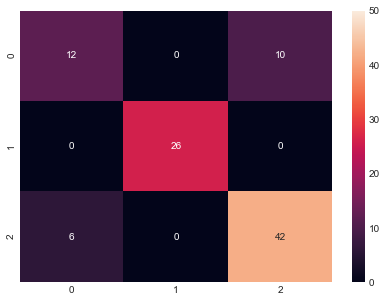

In [53]:
modelling(LogisticRegression(),"Logistic Regression")

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


Accuracy = 90.0
             precision    recall  f1-score   support

          H       0.77      0.77      0.77        22
          L       1.00      1.00      1.00        26
          M       0.90      0.90      0.90        48

avg / total       0.90      0.90      0.90        96



Gradient Boosting
AUC Score for each lable
{'L': 1.0, 'M': 0.8958333333333335, 'H': 0.8525798525798526}




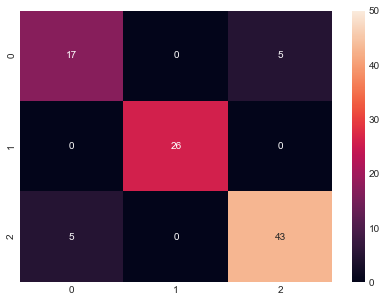

In [54]:
modelling(GradientBoostingClassifier(),"Gradient Boosting")

# Hyper parameter tuning

In [55]:
# Grid search cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.8229166666666666


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Accuracy = 90.0
             precision    recall  f1-score   support

          H       0.80      0.73      0.76        22
          L       1.00      1.00      1.00        26
          M       0.88      0.92      0.90        48

avg / total       0.89      0.90      0.89        96



Logistic Regression tuned
AUC Score for each lable
{'L': 1.0, 'M': 0.8958333333333333, 'H': 0.8366093366093367}




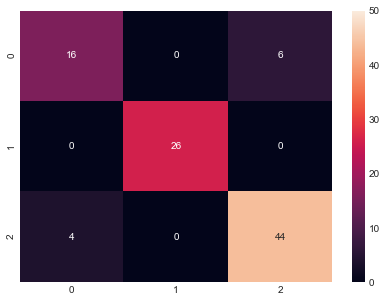

In [56]:
modelling(LogisticRegression(C=1.0,penalty='l1'),"Logistic Regression tuned")

Initial model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [57]:
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

In [58]:

#clf.fit(x_train,y_train)
#print(clf.score(x_train,y_train))
#print(clf.best_params_)